# Контрольна робота 
# з курсу "Сучасні технології моделювання економічних процесів"
# студентки групи ЕК - 61
# Комаріст Катерини
## варінт 5

In [268]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt


## 1. Підготовка даних

### Імпорт даних та обчислення основних статистик:

In [229]:
df = pd.read_csv('komarist_ek61_data_var5.csv', sep=';',decimal=",")

In [230]:
df

,ActualPower,Max Capacity,Location 3,Location 5,Location 7,Location 9
0,0.142,42.50,2.930,2.855,2.770,2.097
1,0.332,42.50,2.963,2.892,2.795,2.087
2,0.563,42.50,2.926,2.853,2.808,2.084
3,0.532,42.50,2.984,2.907,2.799,2.066
4,0.508,42.50,2.893,2.836,2.649,1.980
...,...,...,...,...,...,...
306,1.517,NaN,1.111,0.526,0.524,1.729
307,1.596,NaN,0.542,0.116,0.463,1.811
308,1.537,NaN,0.122,0.594,0.779,1.988
309,0.674,43.75,0.511,0.913,1.071,2.171


In [231]:
df.columns = ['actualpower', 'max_capacity', 'location_3', 'location_5', 'location_7', 'location_9']

In [232]:
df.describe().round(2)

,actualpower,max_capacity,location_3,location_5,location_7,location_9
count,311.00,307.00,310.00,310.00,311.00,310.00
mean,11.28,42.36,5.55,5.53,5.39,4.67
std,7.99,0.71,1.84,1.86,1.81,1.72
min,0.00,39.50,0.12,0.12,0.10,0.05
25%,4.82,42.50,4.83,4.78,4.69,3.98
50%,10.01,42.50,5.69,5.70,5.60,4.82
75%,15.93,42.50,6.71,6.75,6.63,5.76
max,34.18,43.75,8.83,8.68,8.31,7.67


### Перевірка пропусків:

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
actualpower     311 non-null float64
max_capacity    307 non-null float64
location_3      310 non-null float64
location_5      310 non-null float64
location_7      311 non-null float64
location_9      310 non-null float64
dtypes: float64(6)
memory usage: 14.7 KB


In [234]:
df.isna().sum()

actualpower     0
max_capacity    4
location_3      1
location_5      1
location_7      0
location_9      1
dtype: int64

### Висновок:
В змінних "Max Capacity", "Location 3", "Location 5", "Location 9" присутні пропуски.

### Візуалізація даних та заповнення пропусків:

In [235]:
fig = px.histogram(df, x='actualpower')
fig.update_layout(height=500, title_text='Actual power')
fig.show()

In [236]:
fig = px.histogram(df, x='max_capacity')
fig.update_layout(height=500, title_text='Max capacity')
fig.show()

#### Змінні Location 3, 5, 7, 9 мають схожий розподіл значень, тому представлено візуалізацію однієї змінної

In [237]:
fig = px.histogram(df, x='location_5')
fig.update_layout(height=500, title_text='Location 5')
fig.show()

In [238]:
from sklearn.impute import SimpleImputer

df[['max_capacity']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['max_capacity']])
df[['location_3']] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['location_3']])
df[['location_5']] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['location_5']])
df[['location_9']] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df[['location_9']])

In [239]:
df.isna().sum()

actualpower     0
max_capacity    0
location_3      0
location_5      0
location_7      0
location_9      0
dtype: int64

### Висновок: 
З візуалізацій даних видно, що змінна "Max Capacity" приймає дуже обмежену кількість значень. Тому було вирішено замінити пропуски в цій змінній найбільш часто-зустрічаємим значенням. Змінні "Location 3,5,9" мають розподіл близький до нормального (візуально), але з вираженим негативним перекосом. Тому пропуски в цих змінних замінено на медіанні значення, а не на середні. 

### Позбавлення викидів та шкалювання

In [240]:
# Outliers
actualpower = []
for i in df['actualpower']:
    if i > round(df['actualpower'].mean() + 3 * df['actualpower'].std()):
        i = round(df['actualpower'].mean() + 3*df['actualpower'].std())
    actualpower.append(i)
df['actualpower']  = actualpower

location_3 = []
for i in df['location_3']:
    if i > df['location_3'].mean() + 3 * df['location_3'].std():
        i = df['location_3'].mean() + 3*df['location_3'].std()
    location_3.append(i)
df['location_3'] = location_3

location_5 = []
for i in df['location_5']:
    if i > df['location_5'].mean() + 3 * df['location_5'].std():
        i = df['location_5'].mean() + 3*df['location_5'].std()
    location_5.append(i)
df['location_5'] = location_5

location_7 = []
for i in df['location_7']:
    if i > df['location_7'].mean() + 3 * df['location_7'].std():
        i = df['location_7'].mean() + 3*df['location_7'].std()
    location_7.append(i)
df['location_7'] = location_7

location_9 = []
for i in df['location_9']:
    if i > df['location_9'].mean() + 3 * df['location_9'].std():
        i = df['location_9'].mean() + 3*df['location_9'].std()
    location_9.append(i)
df['location_9'] = location_9

In [241]:
df.describe()

,actualpower,max_capacity,location_3,location_5,location_7,location_9
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,11.277576,42.360129,5.552309,5.526347,5.386312,4.665749
std,7.992228,0.704056,1.832605,1.852843,1.806178,1.717428
min,0.002000,39.500000,0.122000,0.116000,0.103000,0.053000
25%,4.816000,42.500000,4.834500,4.779000,4.693500,3.979000
50%,10.008000,42.500000,5.693000,5.704000,5.604000,4.818000
75%,15.932000,42.500000,6.712000,6.745500,6.633500,5.756500
max,34.180000,43.750000,8.829000,8.683000,8.309000,7.670000


In [242]:
from sklearn.preprocessing import StandardScaler

for i in df.columns:
    df[i] = StandardScaler().fit_transform(df[[i]])

In [243]:
df

,actualpower,max_capacity,location_3,location_5,location_7,location_9
0,-1.395546,0.198985,-1.433225,-1.444079,-1.450869,-1.498106
1,-1.371735,0.198985,-1.415189,-1.424078,-1.437006,-1.503938
2,-1.342785,0.198985,-1.435411,-1.445160,-1.429796,-1.505688
3,-1.346670,0.198985,-1.403711,-1.415969,-1.434787,-1.516186
4,-1.349678,0.198985,-1.453447,-1.454350,-1.517970,-1.566341
...,...,...,...,...,...,...
306,-1.223227,0.198985,-2.427401,-2.703092,-2.696383,-1.712726
307,-1.213326,0.198985,-2.738388,-2.924730,-2.730210,-1.664903
308,-1.220720,0.198985,-2.967940,-2.666333,-2.554973,-1.561676
309,-1.328874,1.977272,-2.755331,-2.493887,-2.393046,-1.454949


### Висновок:
Як і було видно з візуалізацій, в даних відсутні викиди.
Оскільки змінні мають значно різні діапазони значень, було вирішено стандартизувати всі змінні.

## 2. Регресія

### Кореляційна матриця

In [244]:
df.corr()

,actualpower,max_capacity,location_3,location_5,location_7,location_9
actualpower,1.000000,-0.304751,0.472532,0.471682,0.438139,0.413864
max_capacity,-0.304751,1.000000,-0.471297,-0.454398,-0.424983,-0.457570
location_3,0.472532,-0.471297,1.000000,0.995088,0.985044,0.947847
location_5,0.471682,-0.454398,0.995088,1.000000,0.991890,0.954882
location_7,0.438139,-0.424983,0.985044,0.991890,1.000000,0.971711
location_9,0.413864,-0.457570,0.947847,0.954882,0.971711,1.000000


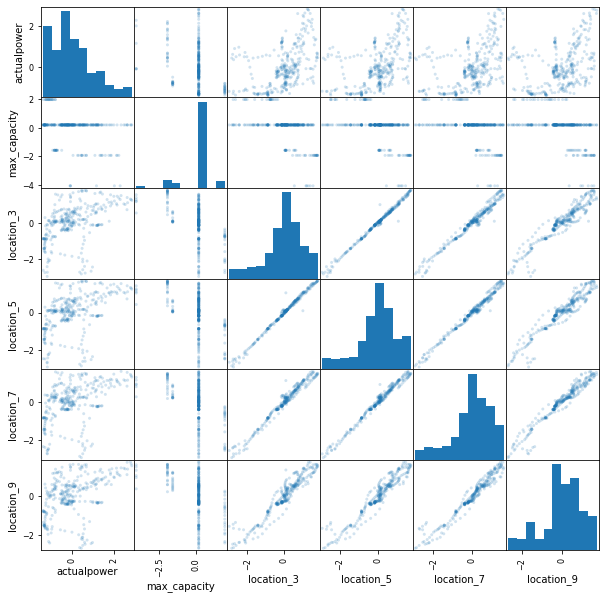

In [267]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

### Висновок:
Змінні Location 3,5,7,9 дуже сильно корелюють. Змінна Max capacity має негативну кореляцію з усіма іншими змінними.
location_3 має найбільшу кореляцію з actual power. 


### Однофакторна модель регресії
Для цієї та наступних моделей дані діляться на тестову та тренувальну вибірки у співвідношенні 20% / 80% відповідно.

Для однофакторної моделі вибрано фактор location_3, що має найбільшу кореляцію з actual power.

In [401]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [402]:
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:,1:2], y_train)

In [403]:
# Getting parameters
sr.coef_, sr.intercept_

(array([0.4350992]), -0.024069360095495294)

In [404]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 1:2])

In [405]:
# Coefficient of determination R^2
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:,1:2], y_test)

(0.19992093401785582, 0.27368892759320784)

In [406]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 1:2])), mean_squared_error(y_test, y_pred)

(0.73681486454139, 0.9435506161485852)

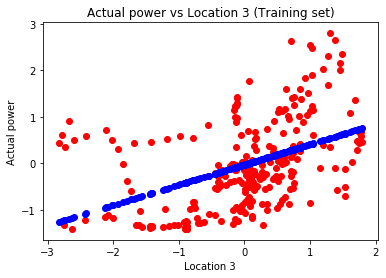

In [407]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], sr.predict(X_train[:, 1:2]), 'bo')
plt.title('Actual power vs Location 3 (Training set)')
plt.xlabel('Location 3')
plt.ylabel('Actual power')
plt.show()

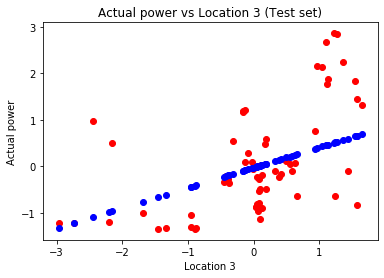

In [408]:
# Visualising the Test set results
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], sr.predict(X_test[:, 1:2]), 'bo')
plt.title('Actual power vs Location 3 (Test set)')
plt.xlabel('Location 3')
plt.ylabel('Actual power')
plt.show()

### Множинна регресія

In [342]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [343]:
mr.coef_, mr.intercept_

(array([-0.05527032, -0.18777792,  2.26984684, -1.54948171, -0.1317205 ]),
 -0.017454580260320953)

In [344]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [345]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.2596253160755395, 0.31590181045010124)

In [346]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.6815317274675622, 0.8887118657257886)

In [354]:
# p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues
#mr1.summary()

array([0.74289551, 0.39845066, 0.71786142, 0.00158013, 0.00950247,
       0.60796263])

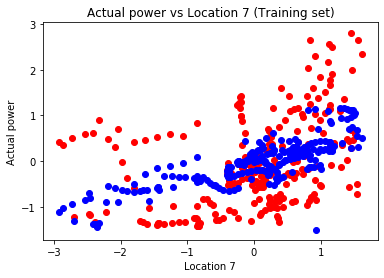

In [419]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], mr.predict(X_train), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

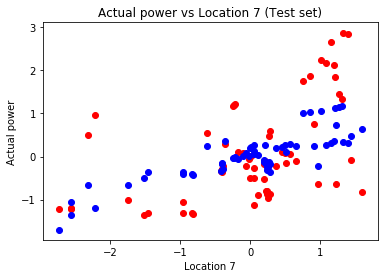

In [371]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], mr.predict(X_test), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

### Поліноміальна регресія 

In [372]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 3:4])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 3:4])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)


In [373]:
# Getting parameters
pr.coef_, pr.intercept_

(array([0.60378088, 0.23735368]), -0.25955229222657633)

In [374]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [375]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)


(0.2728776746242627, 0.3090000156984968)

In [376]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(0.669332630158, 0.8976779863562064)

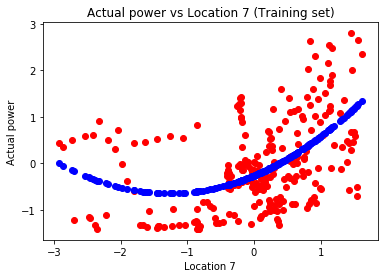

In [420]:

# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

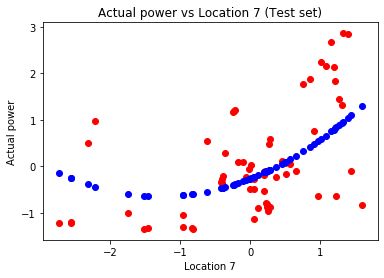

In [421]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

### Вилучення факторів за р-значенням

In [416]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [417]:
X_Modeled

array([[ 2.92807108e-01,  2.44382496e-01],
       [ 7.76559200e-02,  8.24546192e-02],
       [-3.25617412e-01, -3.48428807e-01],
       [ 1.60912154e+00,  1.34626843e+00],
       [ 3.77678305e-01,  3.81910282e-01],
       [ 7.63112468e-01,  8.47730202e-01],
       [-7.31053067e-01, -7.66557639e-01],
       [ 1.55344171e+00,  1.62076945e+00],
       [-1.23703677e+00, -1.34883254e+00],
       [-1.93715679e-01, -2.47501157e-01],
       [ 1.63831290e+00,  1.39395951e+00],
       [ 6.45806418e-01,  6.17038432e-01],
       [ 1.43606787e-01,  3.50301073e-01],
       [-2.52686273e+00, -2.32261799e+00],
       [-1.41596903e+00, -1.43478741e+00],
       [-1.62361988e-01, -1.84837287e-01],
       [ 1.39342977e+00,  1.11724030e+00],
       [ 1.34416912e-01,  2.24418785e-01],
       [ 7.06283686e-02,  2.41055211e-01],
       [ 6.58239778e-01,  6.39220333e-01],
       [ 7.31758777e-01,  8.39966536e-01],
       [-4.63465535e-01, -4.09983582e-01],
       [ 3.78218886e-01,  2.71000777e-01],
       [-1.

In [418]:
X_train

array([[ 0.19898518,  0.2785722 ,  0.29280711,  0.2443825 ,  0.24684181],
       [ 0.19898518,  0.01130886,  0.07765592,  0.08245462, -0.10249774],
       [ 0.19898518, -0.30186476, -0.32561741, -0.34842881, -0.38593517],
       ...,
       [ 0.19898518,  0.48243566,  0.39335515,  0.30260999,  0.37864605],
       [ 0.19898518, -0.13462021, -0.16182141, -0.18317364, -0.28445757],
       [ 0.19898518,  0.12827073,  0.14198504,  0.18948229,  0.23109529]])

### Оптимізована модель

In [423]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 2:4], y_train)

In [424]:
# Getting parameters
omr.coef_, omr.intercept_

(array([ 2.25311164, -1.82200823]), -0.01718097100519944)

In [425]:
# Predicting the Test set results
y_pred = omr.predict(X_test[:, 2:4])

In [426]:
# Coefficient of determination R^2
omr.score(X_train[:, 2:4], y_train), omr.score(X_test[:, 2:4], y_test)

(0.25714832688803546, 0.3216294308681291)

In [427]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 2:4])), mean_squared_error(y_test, y_pred)

(0.6838118523239793, 0.8812711148136662)

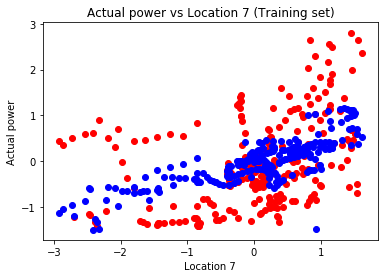

In [428]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], omr.predict(X_train[:, 2:4]), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

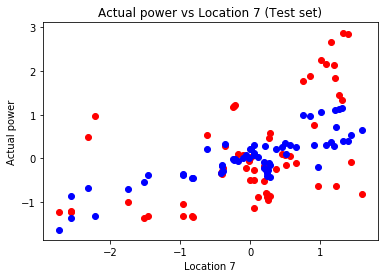

In [429]:

# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], omr.predict(X_test[:, 2:4]), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

In [536]:
summary = pd.DataFrame()
summary['Model'] = ['Simple Linear Regression', 'Multiple Linear Regression','Polynomial Regression'
                    ,'Optimized Multiple Linear Regression']
summary['MSE (Train set)'] = [0.737,0.682,0.669,0.683]
summary['MSE (Test set)'] = [0.944,0.889,0.898,0.881]
summary['R^2 (Train set)'] = [0.199,0.259,0.272,0.257]
summary['R^2 (Test set)'] = [0.274,0.316,0.309,0.322]


### Висновки (регресія):
- Було побудовано просто лінійну модель (з фактором Location 3), модель множинної регресії, поліноміальна модель та оптимізована модель множинної регресії.
- Виходячи з р-значень отриманих з множинної регресії, найбільш вагомими є фактори Location 5 i Location 7. З цими факторами було побудовано оптимізовану модель. 
- Всі моделі мають низький показник R^2 як на навчальній, так і на тестовій виборці. 
- Судячи по тестовій виборці, оптимізована модель множ. регресії є найкращою з регресійних моделей, адже має найнижчий MSE та найвищий R^2.
- Показник MSE в тестовій виборці всих моделей є вищим за відповідний показник в навчальній. Це свідчить про присутність ефекту "перенавченості" моделі. В якості експеременту мінялися значення пропорції розбиття на тестову і навчальні виборки, а також параметр random_state. Це не принесо позитивного ефекту.

In [433]:
summary

,Model,MSE (Train set),MSE (Test set),R^2 (Train set),R^2 (Test set)
0,Simple Linear Regression,0.737,0.944,0.199,0.274
1,Multiple Linear Regression,0.682,0.889,0.259,0.316
2,Polynomial Regression,0.669,0.898,0.272,0.309
3,Optimized Multiple Linear Regression,0.683,0.881,0.257,0.322


## 3. Regression Tree & Random Forest

In [435]:
# Fitting Tree to the Training set (M2)
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 3:4], y_train)

In [436]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 3:4])

In [437]:
# Coefficient of determination R^2
sdt.score(X_train[:, 3:4], y_train), sdt.score(X_test[:, 3:4], y_test)

(0.4639290356286593, 0.3849160381038459)

In [438]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sdt.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(0.4934655091886934, 0.7990554918942219)

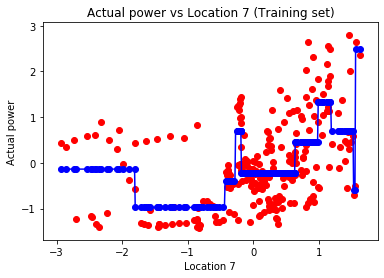

In [453]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

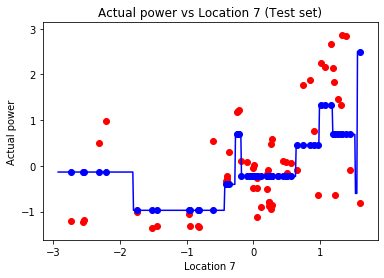

In [454]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

In [493]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [494]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [495]:
# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9999999996904083, 0.32999021697311137)

In [496]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(2.84986186007866e-10, 0.870409618712965)

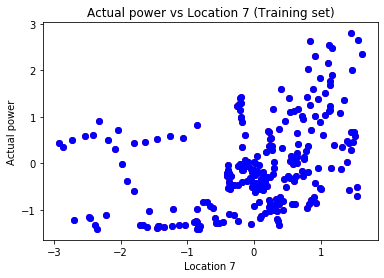

In [497]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], dt.predict(X_train), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

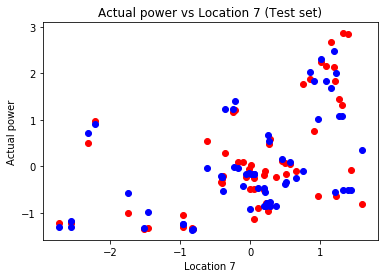

In [492]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], dt.predict(X_test), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

In [528]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 1).fit(X_train, y_train)

In [529]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [530]:
# Coefficient of determination R^2
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9215700281248468, 0.6994253955630936)

In [531]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.07219657205723583, 0.3904764280616909)

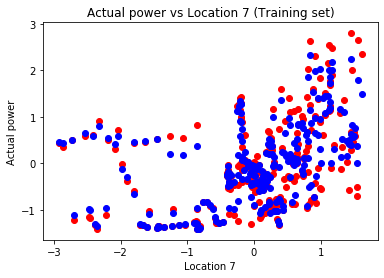

In [532]:

# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], rf.predict(X_train), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

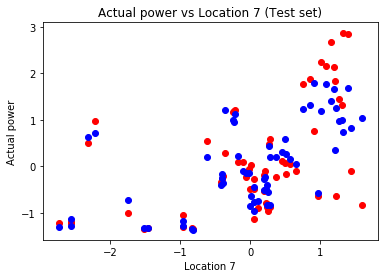

In [533]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rf.predict(X_test), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

In [537]:
summary = summary.append({'Model':'Simple Desicion Tree', 
                'MSE (Train set)': '0.493',
               'MSE (Test set)':'0.799',
               'R^2 (Train set)': '0.464',
               'R^2 (Test set)':'0.385'},ignore_index=True)
summary = summary.append({'Model':'Tree', 
                'MSE (Train set)': '0.0002',
               'MSE (Test set)':'0.87',
               'R^2 (Train set)': '0.999',
               'R^2 (Test set)':'0.33'},ignore_index=True)
summary = summary.append({'Model':'Random Forest', 
                'MSE (Train set)': '0.072',
               'MSE (Test set)':'0.39',
               'R^2 (Train set)': '0.922',
               'R^2 (Test set)':'0.699'},ignore_index=True)

### Висновки (Regression Tree & Random Forest):
- Було побудовано модель простого дерева рішень (з фактором Location 7), дерево рішень з усіма факторами, також була спроба пободови дерева рішень з тільки значущими факторами (Location 5, Location 7), але якість модель булі відносно гіршою (MSE (Test set)>1). Також було побудовано модель Random Forest.
- Модель Random Forest	є найкращою з усих моделей дерев та регресій (по параметрам MSE (Test set) і R^2 (Test set)).
- Як і в випадку з моделями регресії, моделі дерев рішень демонстрували вищу якість на навчальній виборці. Змінювалися параметри дерев та лісу, але це викликало збільшення MSE на тестовій виборці. 


In [538]:
summary

,Model,MSE (Train set),MSE (Test set),R^2 (Train set),R^2 (Test set)
0,Simple Linear Regression,0.737,0.944,0.199,0.274
1,Multiple Linear Regression,0.682,0.889,0.259,0.316
2,Polynomial Regression,0.669,0.898,0.272,0.309
3,Optimized Multiple Linear Regression,0.683,0.881,0.257,0.322
4,Simple Desicion Tree,0.493,0.799,0.464,0.385
5,Tree,0.0002,0.87,0.999,0.33
6,Random Forest,0.072,0.39,0.922,0.699


## 4. Regression Neural Network

In [540]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [543]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 5))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=5, units=6)`

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=6)`

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`



In [544]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/100
248/248 [==============================] - 0s 1ms/step - loss: 1.3422 - accuracy: 0.0000e+00
Epoch 2/100
248/248 [==============================] - 0s 89us/step - loss: 1.0387 - accuracy: 0.0000e+00
Epoch 3/100
248/248 [==============================] - 0s 101us/step - loss: 0.8666 - accuracy: 0.0000e+00
Epoch 4/100
248/248 [==============================] - 0s 85us/step - loss: 0.7732 - accuracy: 0.0000e+00
Epoch 5/100
248/248 [==============================] - 0s 81us/step - loss: 0.7294 - accuracy: 0.0000e+00
Epoch 6/100
248/248 [==============================] - 0s 85us/step - loss: 0.7117 - accuracy: 0.0000e+00
Epoch 7/100
248/248 [==============================] - 0s 97us/step - loss: 0.7023 - accuracy: 0.0000e+00
Epoch 8/100
248/248 [==============================] - 0s 93us/step - loss: 0.6962 - accuracy: 0.0000e+00
Epoch 9/100
248/248 [==============================] - 0s 105us/step - loss: 0.6900 - accuracy: 0.0000e+00
Epoch 10/100
248/248 [=======================

248/248 [==============================] - 0s 85us/step - loss: 0.4989 - accuracy: 0.0000e+00
Epoch 78/100
248/248 [==============================] - 0s 85us/step - loss: 0.4959 - accuracy: 0.0000e+00
Epoch 79/100
248/248 [==============================] - 0s 85us/step - loss: 0.4960 - accuracy: 0.0000e+00
Epoch 80/100
248/248 [==============================] - 0s 81us/step - loss: 0.4976 - accuracy: 0.0000e+00
Epoch 81/100
248/248 [==============================] - 0s 81us/step - loss: 0.4932 - accuracy: 0.0000e+00
Epoch 82/100
248/248 [==============================] - 0s 77us/step - loss: 0.4913 - accuracy: 0.0000e+00
Epoch 83/100
248/248 [==============================] - 0s 81us/step - loss: 0.4916 - accuracy: 0.0000e+00
Epoch 84/100
248/248 [==============================] - 0s 81us/step - loss: 0.4934 - accuracy: 0.0000e+00
Epoch 85/100
248/248 [==============================] - 0s 81us/step - loss: 0.4880 - accuracy: 0.0000e+00
Epoch 86/100
248/248 [============================

In [545]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

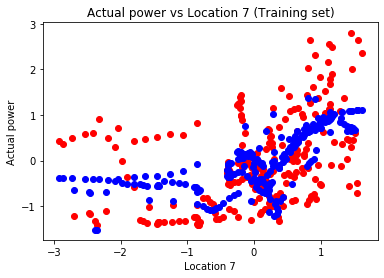

In [546]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], rnn.predict(X_train), 'bo')
plt.title('Actual power vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

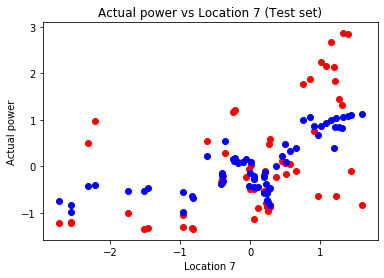

In [547]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rnn.predict(X_test), 'bo')
plt.title('Actual power vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('Actual power')
plt.show()

In [549]:
mean_squared_error(y_train, rnn.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.468658952865948, 0.6775301331285606)

In [552]:
summary = summary.append({'Model':'RNN', 
                'MSE (Train set)': '0.468',
               'MSE (Test set)':'0.677',
               'R^2 (Train set)': '',
               'R^2 (Test set)':''},ignore_index=True)

### Висновки:


- Найкращою з усіх для прогнозування виявилася модель Random Forest	
- Моделі нейронних мереж з різними архітектурами давали гірші результати, ніж модель Random Forest	
- Всі параметри якості побудованих моделей представлено у таблиці нижче

In [553]:
summary

,Model,MSE (Train set),MSE (Test set),R^2 (Train set),R^2 (Test set)
0,Simple Linear Regression,0.737,0.944,0.199,0.274
1,Multiple Linear Regression,0.682,0.889,0.259,0.316
2,Polynomial Regression,0.669,0.898,0.272,0.309
3,Optimized Multiple Linear Regression,0.683,0.881,0.257,0.322
4,Simple Desicion Tree,0.493,0.799,0.464,0.385
5,Tree,0.0002,0.87,0.999,0.33
6,Random Forest,0.072,0.39,0.922,0.699
7,RNN,0.468,0.677,,
